# Predicting the prices of Avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

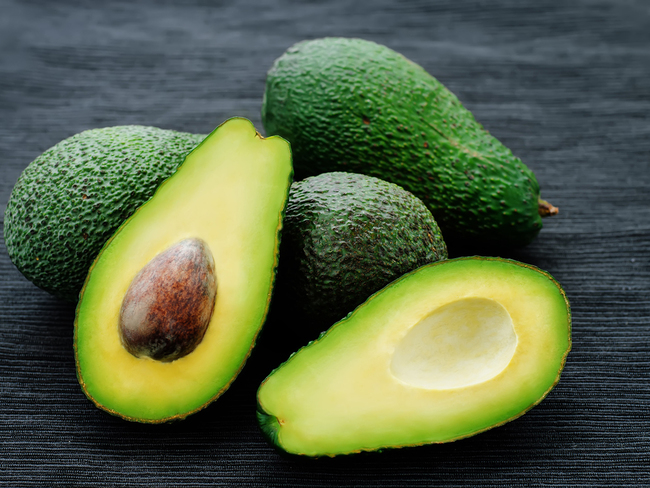

In [51]:
from IPython.display import Image 
url = r"C:\Users\vincent\OneDrive\Desktop\AVACADO -PRICE PREDICTION\Fruti.jpg"
Image(url,height=300,width=400)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r"C:\Users\vincent\OneDrive\Desktop\Python_Datascience\avocado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [53]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


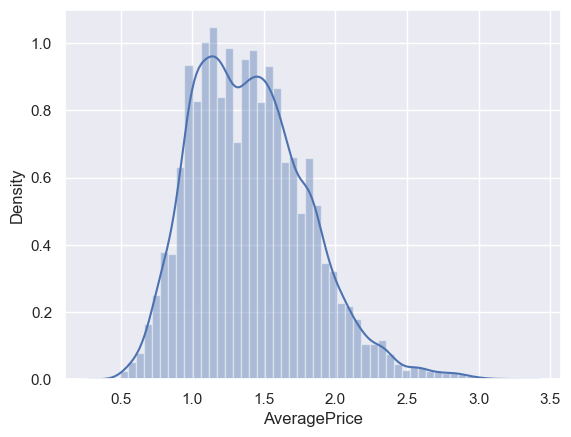

In [54]:
sns.distplot(data['AveragePrice']);

<Axes: xlabel='year', ylabel='count'>

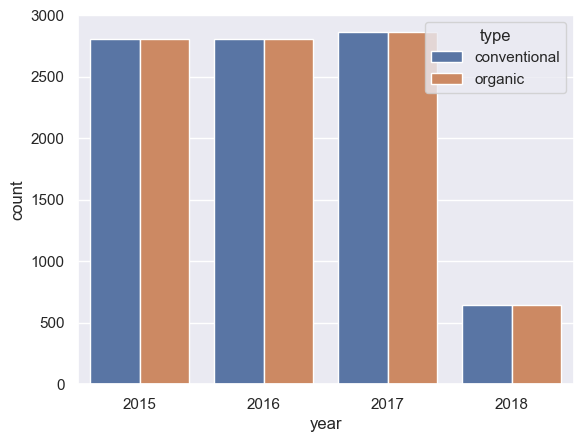

In [55]:
sns.countplot(x='year',data=data,hue='type')

There are almost equal numbers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [56]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

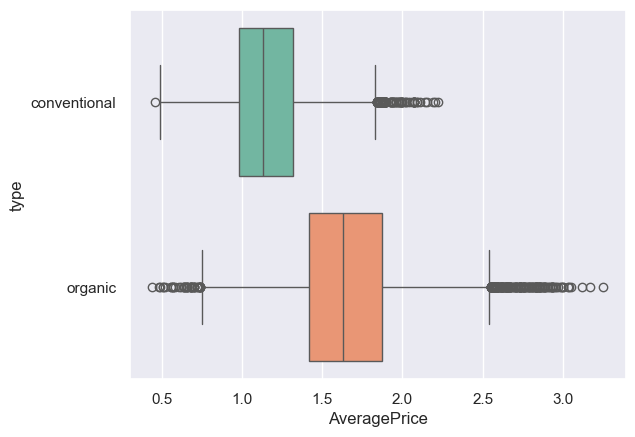

In [57]:
sns.boxplot(y='type',x='AveragePrice',data=data,palette='Set2');

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

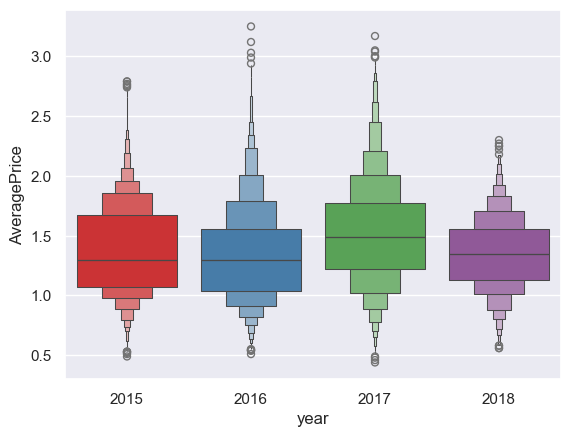

In [58]:
data.year=data.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=data,palette='Set1');

The analysis indicates that avocado prices were somewhat higher in 2017, potentially due to a supply shortage during that period.

### Dealing with categorical features.

In [59]:
data['type']=data['type'].map({'conventional':0,'organic':1})

data.Date=data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [60]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


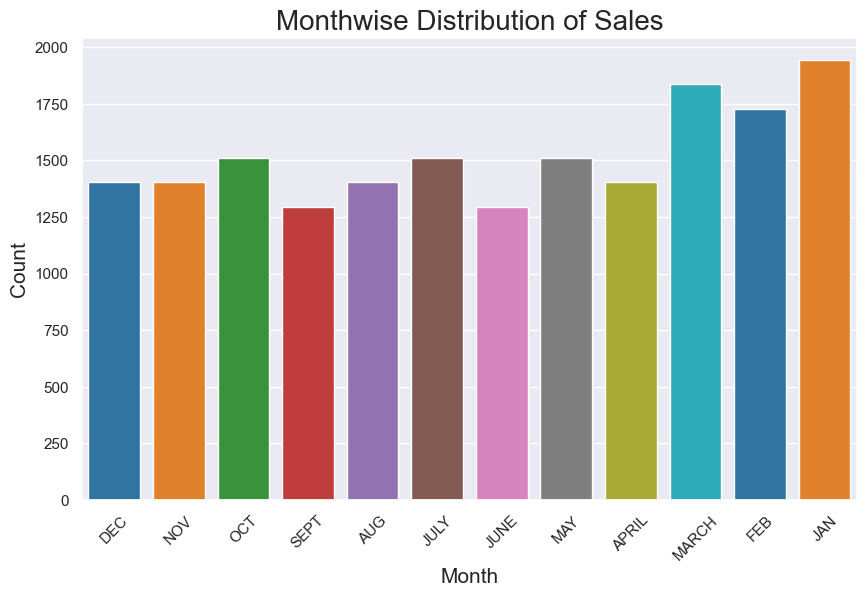

In [61]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette("tab10", n_colors=len(data['Month'].unique()))
sns.countplot(x='Month', data=data, palette=palette)

plt.title('Monthwise Distribution of Sales', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45) 
plt.show()

It implies that sales of avacado see a rise in January, Febuary and March.

## Preparing data for ML models

In [62]:
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [63]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


In [64]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year_2016,...,Month_DEC,Month_FEB,Month_JAN,Month_JULY,Month_JUNE,Month_MARCH,Month_MAY,Month_NOV,Month_OCT,Month_SEPT
12619,-0.240063,-0.229976,-0.240940,-0.215666,-0.228168,-0.245381,-0.157600,-0.180983,1,True,...,False,False,False,False,False,False,False,False,True,False
1163,0.617031,1.406926,0.186851,0.534516,0.070915,0.165816,-0.220280,0.012557,0,False,...,False,False,False,False,False,False,False,False,False,False
10054,-0.245698,-0.230096,-0.243466,-0.215641,-0.244732,-0.245625,-0.223436,-0.180983,1,False,...,False,True,False,False,False,False,False,False,False,False
626,-0.029349,-0.153419,0.023309,0.059928,0.058946,-0.199445,0.856349,-0.176308,0,False,...,True,False,False,False,False,False,False,False,False,False
3125,1.001831,0.984138,0.923555,0.666077,1.047424,1.338668,0.031640,1.472198,0,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,-0.216237,-0.173904,-0.238676,-0.210071,-0.219924,-0.225231,-0.185762,-0.180983,0,False,...,False,True,False,False,False,False,False,False,False,False
17456,0.094682,-0.149790,-0.052283,-0.204163,0.612621,0.807397,0.019135,-0.178348,1,False,...,False,False,False,False,False,False,False,False,True,False
13517,-0.242865,-0.230630,-0.246487,-0.215666,-0.230353,-0.226626,-0.223436,-0.180983,1,True,...,False,False,False,True,False,False,False,False,False,False
4555,0.065107,0.264029,-0.050505,-0.004072,-0.048173,-0.165561,0.322855,-0.178184,0,True,...,False,False,False,False,False,False,True,False,False,False


In [65]:
X_test

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year_2016,...,Month_DEC,Month_FEB,Month_JAN,Month_JULY,Month_JUNE,Month_MARCH,Month_MAY,Month_NOV,Month_OCT,Month_SEPT
14247,-0.243463,-0.229725,-0.244145,-0.210000,-0.237131,-0.238422,-0.214796,-0.180983,1,True,...,False,False,False,False,True,False,False,False,False,False
3393,0.090762,0.230349,-0.055065,-0.198784,0.112493,0.190518,-0.116728,-0.147999,0,True,...,False,False,False,False,False,False,False,False,False,True
5290,-0.218227,-0.212025,-0.227926,-0.184958,-0.193850,-0.179676,-0.219574,-0.180428,0,True,...,False,False,False,False,False,False,False,False,False,False
9322,-0.246069,-0.230633,-0.243733,-0.215666,-0.245015,-0.246121,-0.223061,-0.180983,1,False,...,False,False,False,False,False,True,False,False,False,False
11882,-0.245016,-0.229448,-0.244403,-0.215534,-0.242026,-0.242292,-0.222699,-0.180983,1,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,-0.215575,-0.206195,-0.193047,-0.215637,-0.231603,-0.228277,-0.223436,-0.180983,1,False,...,False,False,False,False,False,False,False,False,False,False
2267,-0.077428,-0.059539,-0.044722,-0.080447,-0.131863,-0.097167,-0.221527,-0.178883,0,False,...,False,False,False,False,False,False,True,False,False,False
14641,-0.197662,-0.207638,-0.219780,-0.215058,-0.133859,-0.203837,0.095087,-0.180983,1,True,...,False,False,False,False,False,False,False,True,False,False
6335,-0.140975,-0.168135,-0.198523,0.114460,-0.047685,-0.008663,-0.172994,0.106507,0,False,...,False,False,False,False,True,False,False,False,False,False


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]
    

In [68]:
results


,MAE,MSE,R2-score
Linear Regression,0.181,0.057,0.644
Decision Tree,0.132,0.041,0.742
Random Forest,0.095,0.019,0.882
Support Vector Machines,0.114,0.026,0.839
K-nearest Neighbors,0.098,0.023,0.857
XGBoost,0.093,0.016,0.898


## Deep Neural Network

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Creating the model
model = Sequential([
    Dense(76, activation='relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
          bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)),
    Dense(200, activation='relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
          bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)),
    Dropout(0.5),
    Dense(200, activation='relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
          bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)),
    Dropout(0.5),
    Dense(200, activation='relu', kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
          bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)),
    Dropout(0.5),
    Dense(1)
])

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_val, y_val),
                    batch_size=100, epochs=150, callbacks=[early_stop])

# Evaluate the model
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
model.summary()


Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6094 - val_loss: 0.1842
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1548 - val_loss: 0.1603
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1207 - val_loss: 0.1338
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1097 - val_loss: 0.1050
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0929 - val_loss: 0.0884
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - val_loss: 0.0923
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818 - val_loss: 0.0856
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0759 - val_loss: 0.0625
Epoch 9/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728 - val_loss: 0.0680
Epoch 10/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0679 - val_loss: 0.0511
Epoch 11/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0647 - val_loss: 0.0506
Epoch 12/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 76)             │         5,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        15,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,561 (1.17 MB)

 Trainable params: 101,853 (397.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,708 (795.74 KB)

In [75]:
losses = pd.DataFrame(model.history.history)

# Plot the training and validation loss
if 'loss' in losses.columns and 'val_loss' in losses.columns:
    losses[['loss', 'val_loss']].plot(figsize=(10, 6))
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
else:
    print("The keys 'loss' and 'val_loss' are not available in the history dictionary.")

The keys 'loss' and 'val_loss' are not available in the history dictionary.


In [80]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

Let's have a look at methods performing best as they have R2-score close to 1.

In [77]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.093000,0.016000,0.898000
Random Forest,0.095000,0.019000,0.882000
K-nearest Neighbors,0.098000,0.023000,0.857000
Support Vector Machines,0.114000,0.026000,0.839000
Decision Tree,0.132000,0.041000,0.742000
Linear Regression,0.181000,0.057000,0.644000


## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.